In [1]:
import joblib
import numpy as np

# Load preprocessed training and test sets
X_train_bal = joblib.load('../data/preprocessed/X_train_bal.pkl')
y_train_bal = joblib.load('../data/preprocessed/y_train_bal.pkl')
X_test_processed = joblib.load('../data/preprocessed/X_test_processed.pkl')
y_test = joblib.load('../data/preprocessed/y_test.pkl')


Train Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_processed)
y_proba_lr = lr_model.predict_proba(X_test_processed)[:, 1]


Evaluate Logistic Regression

🔍 Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     27393
           1       0.79      0.57      0.66      2830

    accuracy                           0.95     30223
   macro avg       0.87      0.78      0.82     30223
weighted avg       0.94      0.95      0.94     30223



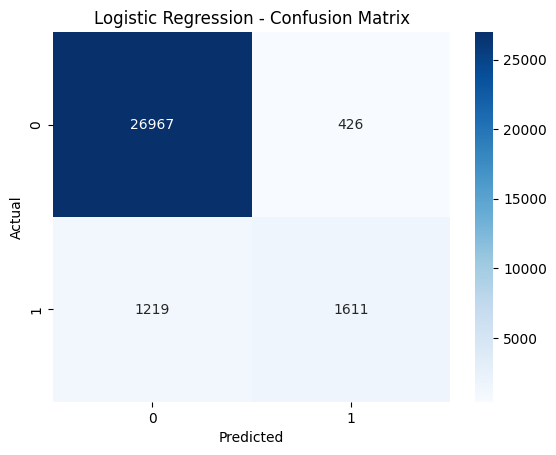

F1 Score: 0.6620
Average Precision (AUC-PR): 0.6172


In [3]:
# Classification report
print("🔍 Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# F1 Score
f1_lr = f1_score(y_test, y_pred_lr)
print(f"F1 Score: {f1_lr:.4f}")

# Average Precision Score (AUC-PR)
auc_pr_lr = average_precision_score(y_test, y_proba_lr)
print(f"Average Precision (AUC-PR): {auc_pr_lr:.4f}")


High accuracy (95%) overall — but this can be misleading when data is imbalanced.

Class 0 (non-fraud) is predicted very well: both high recall and precision.

Class 1 (fraud) shows lower recall (57%). That means the model is missing a lot of fraud cases.

But precision is decent (79%), so when it predicts fraud, it’s often correct.

F1-score for fraud: 66% is an okay starting point for a baseline.

Logistic Regression is a linear model, and fraud patterns might not be linear — especially with engineered and complex features. It often struggles to separate overlapping classes in high dimensions.

🔍 Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.97      0.54      0.70      2830

    accuracy                           0.96     30223
   macro avg       0.96      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223

🧾 Confusion Matrix:
[[27352    41]
 [ 1299  1531]]
📈 AUC-PR: 0.6297


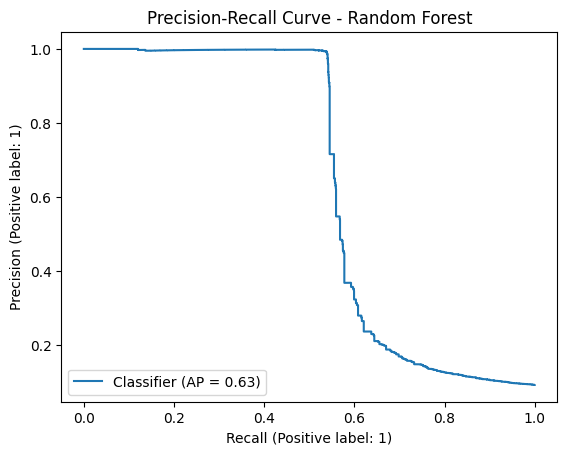

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# ===== Step 2: Initialize and Train Random Forest =====
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,               # Limits the depth of the trees
    max_features='sqrt',       # Use only sqrt(n_features) for each split (default for classification)
    n_jobs=-1,                  # Use all CPU cores for faster training
    random_state=42
)

# Train the model
rf_model.fit(X_train_bal, y_train_bal)

# ===== Step 3: Predict on Test Set =====
y_pred = rf_model.predict(X_test_processed)
y_proba = rf_model.predict_proba(X_test_processed)[:, 1]  # Probabilities for class 1

# ===== Step 4: Evaluate =====
print("🔍 Random Forest Evaluation:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC-PR
auc_pr = average_precision_score(y_test, y_proba)
print(f"📈 AUC-PR: {auc_pr:.4f}")

# Precision-Recall Curve
disp = PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Precision-Recall Curve - Random Forest")
plt.show()
